# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Iris dataset** from `scikit-learn`. This dataset is a classic dataset in machine learning and statistics, widely used for clustering tasks. It consists of many samples of iris flowers. Here are the key features and characteristics of the dataset:

##### Features:
1. **Sepal Length**: The length of the sepal in centimeters.
2. **Sepal Width**: The width of the sepal in centimeters.
3. **Petal Length**: The length of the petal in centimeters.
4. **Petal Width**: The width of the petal in centimeters.

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

There are 150 observations.<br>
There are 4 columns.

In [11]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris_data = load_iris()

# Convert to DataFrame
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Display the DataFrame
print(iris_df)

# Your code here...
iris_df.head()

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### **Question 2:** 
#### Data-visualization

Let's create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).


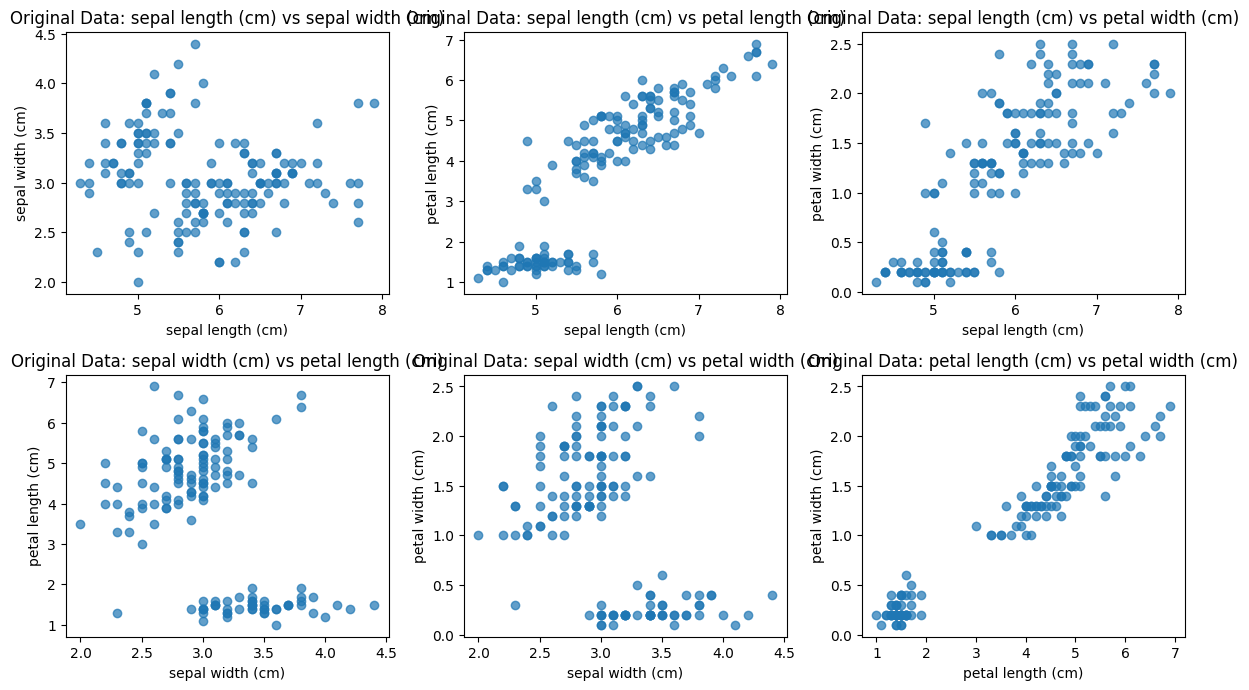

In [12]:
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(12, 10))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = iris_df.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(iris_df, feature_names, title_prefix='Original Data: ')

**Question:**
- Do you notice any patterns or relationships between the different features? How might these patterns help in distinguishing between different species?

> Your answer...<br>
sepal width - sepal length<br>
there appears to be 2 clusters, one where sepal width is greater than 3.0 and the other with sepal length greater than 5cm<br>
<br>
petal length - sepal length<br>
one tight cluster with smaller petal and sepal lengths and another with both larger petal and sepal lengths<br>
<br>
petal width - sepal length<br>
one small cluster with both smaller width and length and much broader cluster with larger width and length<br>
<br>
petal length - sepal width<br>
two distinct clusters, one with larger petal length and the other with larger sepal width<br>
<br>
petal width - sepal width<br>
two distinct clusters, one with petal lengths larger than 1cm and the other flat cluster with sepal width larger than 3cm<br>
<br>
petal width - petal length<br>
one very tigth cluster with very small petal width and the other broader cluster with larger petal width and length<br>
<br>
Some of the tighter clusters could be used to help with distinguishing different species, the broader ones not so much.

#### **Question 3:** 
#### Data cleaning

In [14]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset
scaled_features = scaler.fit_transform(iris_df)

# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

# Display the first few rows of the scaled DataFrame
print(scaled_iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

It is important to standardize the data prior to clustering to ensures that all features contribute equally to the distance calculations, preventing any single feature from dominating the results due to its scale.

The quality of clustering is measured by the within-cluster-sum-of-squared-distances.  Therefore, if the distances are standardized, then certain features could dominate the analysis. Standardizing ensures both features contribute equally to the grouping process, which is critical when feature ranges differ significantly, but less important when interpretation matters. 

#### **Question 4:** 
#### K-means clustering 

Apply the K-Means clustering algorithm to the Iris dataset. Choose the value 3 for the number of clusters (`k=3`) and fit the model. Assign cluster labels to the original data and add them as a new column in the DataFrame.

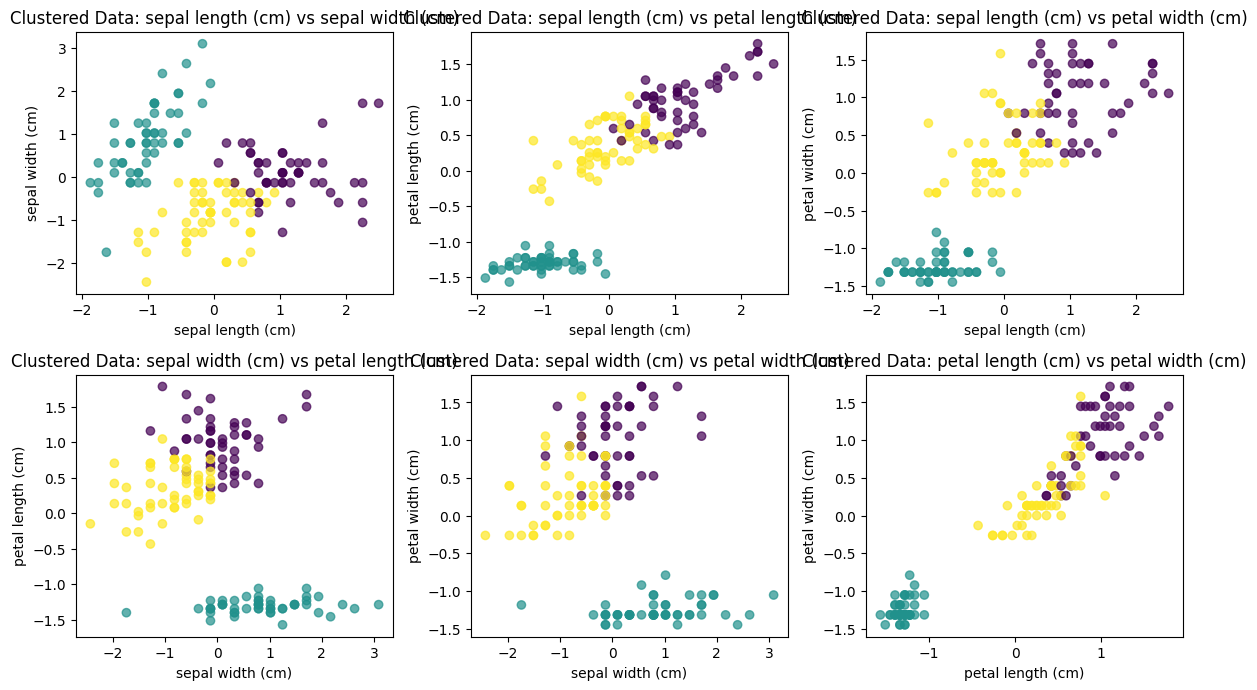

In [94]:
# Your answer...
#k-means clustering
kmeans = KMeans(n_clusters=3, random_state=123, n_init=10)
clustered_iris_data = scaled_iris_df
clusters = kmeans.fit(clustered_iris_data)

# Add cluster labels to the copied DataFrame
clustered_iris_data['Cluster'] = clusters.labels_

# Display the updated DataFrame with the 'Cluster' column
clustered_iris_data

# Use the helper function to plot scatter plots, colored by cluster labels
plot_feature_pairs(clustered_iris_data, feature_names, color_labels=clustered_iris_data['Cluster'], title_prefix='Clustered Data: ')

We chose `k=3` for the number of clusters arbitrarily. However, in a real-world scenario, it is important to determine the optimal number of clusters using appropriate methods.

**Question**: What is one method commonly used to determine the optimal number of clusters in K-means clustering, and why is this method helpful?

> Your answer here...<br>
Elbow method<br>
<br>
 This method is helpful because it is easy to implement and easy to interpret visually.  The method helps to select a number of clusters which provides a good balance between capturing the structure in the data and minimizing the WSSD without over-complicating the model.

#### **Question 5:** 
#### Bootstrapping 

Implement bootstrapping on the mean of Petal Width. Generate 10000 bootstrap samples, calculate the mean for each sample, and compute a 90% confidence interval.

In [93]:
# Your answer here...

np.random.seed(123)
one_sample = iris_df.sample(n=40)
mean_petal_width = one_sample['petal width (cm)'].mean()

# Initialize an empty list to store the bootstrap samples
bootstrap_samples = []

for i in range(10_000):
    sample = one_sample.sample(frac=1, replace=True)  # Sample with replacement
    sample = sample.assign(replicate=i)  # Add replicate number
    bootstrap_samples.append(sample)  # Store the sample


# Combine all bootstrap samples into one DataFrame
boot10000 = pd.concat(bootstrap_samples)
pedal_width_means = boot10000.groupby('replicate')['petal width (cm)'].mean().reset_index(name='mean_petal_width_cm')
#mean_petal_width

ci_bounds = pedal_width_means["mean_petal_width_cm"].quantile([0.05, 0.95])

lower_bound = ci_bounds[0.05]
upper_bound = ci_bounds[0.95]


# Display the result
print(f"Mean of Petal Width: {mean_petal_width}")
print(f"90% Confidence Interval of Mean Petal Width: ({lower_bound}, {upper_bound})")

Mean of Petal Width: 1.07
90% Confidence Interval of Mean Petal Width: (0.865, 1.27)


**Question:**
- Why do we use bootstrapping in this context? What does it help us understand about the mean?

>  Your answer...<br>
Bootstrapping, in this context of clustting, aids in assessing the stability and reliability of the clusters.  The technique of generating multiple bootstrap samples and clustring each one allows you to see how consistent the clustering results are.  It helps to determine the variability and uncertainty around the mean estimate.

**Question:**
- What is the purpose of calculating the confidence interval from the bootstrap samples? How does it help us interpret the variability of the estimate?

> Your answer...<br>The purpose of calculating the confidence interval is to provide you a range within which the true value of an estimate is likely to be within.<br>It helps to interpret the variability of the estimate through the size of the range.  If the range is narrow, it indicates that the estimate is relatively stable and reliable. Conversely, if the range is wide it would suggest greater variability and less certainty about the estimate. This helps in assessing the reliability of the clustering results.

**Question:**

- Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the Petal Width appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

In [98]:
iris_df["petal width (cm)"].min()

0.1

> Your answer here...<br>
The min and max value for the Petal Width is 0.1 - 2.5.  The range of the interval is roughly 0.4.  This is isn't large, but also at the same time not so narrow as well.  This would suggest that there is some moderate variability in the estimates.  So, the mean is some what stable and reliable estimate of the Petal Width.  I would be motivated to use the elbow method to see if a better estimate of k should be used.

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are well-constructed and correctly interpreted to explore relationships between features and species. | Visualizations are poorly constructed or not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
